# Pymaceuticals Inc.
---

### Analysis

- Below, we have the analysis for data showing results of drug testing on 249 mice for 10 drug regimens, by looking at the progression of the size of tumor over time. In the tables and charts, we delve deep into the data to find the treatment that is proven to be the most effective.

- The data reveals that about half of the mice used were male and the other half female, which shows an even distribution, indicating our data is a good representation of behavior accross the population of mice.

- To find the best performing drug, we examine the 2 drugs used on the highest number of mice, and 2 others picked at random. The box plots examine the statistical nature of the data points for each drug to determine which one has the smallest tumor size. In this, we find that Capomulin has the best results because more of the tumor size data points are below the mean. 

- To verify these results, we go further to investigate whether the tumor size for mice using this drug reduces over time and find that in general, there is a significant drop in tumor size, which further supports our choice for the best treatment in the study.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Reduce decimal points
combined_df['Tumor Volume (mm3)'] = round(combined_df['Tumor Volume (mm3)'], 1)

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
combined_df['Mouse ID'].nunique()

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_df[combined_df[['Mouse ID', 'Timepoint']].duplicated()]
duplicates['Mouse ID'].unique()

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_df.loc[combined_df['Mouse ID'] == 'g989']
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.0,0,Propriva,Female,21,26
137,g989,0,45.0,0,Propriva,Female,21,26
329,g989,5,48.8,0,Propriva,Female,21,26
360,g989,5,47.6,0,Propriva,Female,21,26
620,g989,10,51.7,0,Propriva,Female,21,26
681,g989,10,49.9,0,Propriva,Female,21,26
815,g989,15,51.3,1,Propriva,Female,21,26
869,g989,15,53.4,0,Propriva,Female,21,26
950,g989,20,55.3,1,Propriva,Female,21,26
1111,g989,20,54.7,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.loc[combined_df['Mouse ID'] != 'g989']
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimens = clean_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_drug_regimens = round(drug_regimens['Tumor Volume (mm3)'].mean(), 2)
median_drug_regimens = round(drug_regimens['Tumor Volume (mm3)'].median(), 2)
var_drug_regimens = round(drug_regimens['Tumor Volume (mm3)'].var(), 2)
std_drug_regimens = round(drug_regimens['Tumor Volume (mm3)'].std(), 2)
sem_drug_regimens = round(drug_regimens['Tumor Volume (mm3)'].sem(), 2)

# Assemble the resulting series into a single summary DataFrame.
drug_regimen_summary = pd.DataFrame({
    'Mean Tumor Volume': mean_drug_regimens,
    'Median Tumor Volume': median_drug_regimens,
    'Tumor Volume Variance': var_drug_regimens,
    'Tumor Volume Std. Dev.': std_drug_regimens,
    'Tumor Volume Std. Err.': sem_drug_regimens
})
drug_regimen_summary.index.name='Drug Regimen'

drug_regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.68,41.55,24.95,5.00,0.33
Ceftamin,52.59,51.80,39.25,6.27,0.47
Infubinol,52.89,51.80,43.07,6.56,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.50,66.18,8.14,0.60
Placebo,54.03,52.30,61.15,7.82,0.58
Propriva,52.32,50.45,43.89,6.62,0.54
Ramicane,40.22,40.70,23.47,4.84,0.32
Stelasyn,54.24,52.40,59.45,7.71,0.57


## Bar and Pie Charts

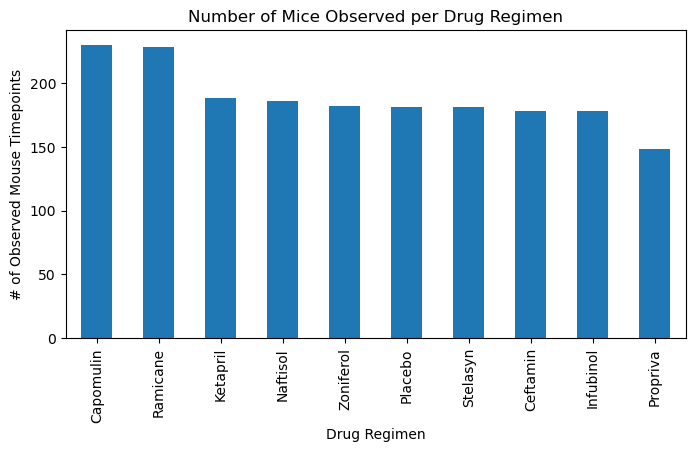

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bargraph = drug_regimens['Timepoint'].count()
bargraph = bargraph.sort_values(ascending = False)

bargraph.plot(kind='bar', figsize= (8, 4),
              title = 'Number of Mice Observed per Drug Regimen',
              xlabel = 'Drug Regimen',
              ylabel = '# of Observed Mouse Timepoints')
plt.show()

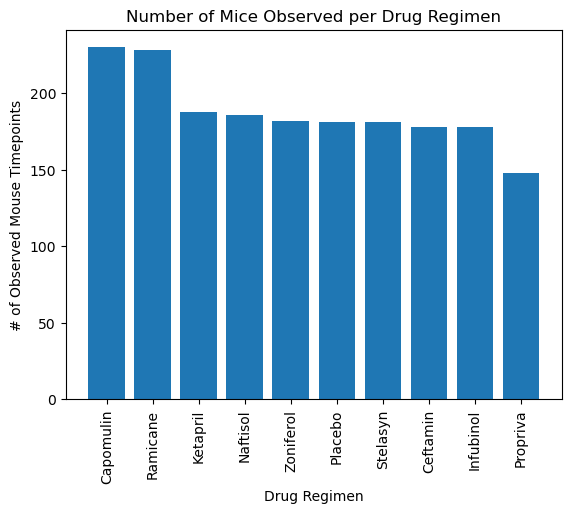

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = len(drug_regimens)
plt.bar(range(x_axis), bargraph.values)
plt.title('Number of Mice Observed per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(range(x_axis), bargraph.index, rotation = 90)
plt.show()

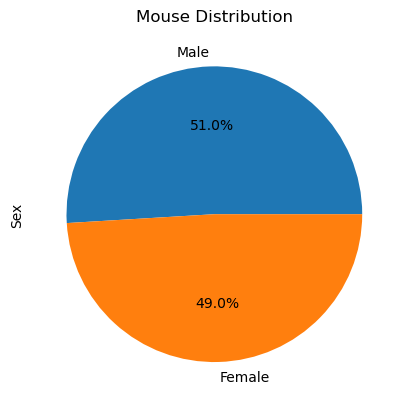

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = clean_df['Sex'].value_counts()
gender_df.plot(kind='pie', ylabel= 'Sex', title= 'Mouse Distribution', autopct='%1.1f%%')
plt.show()

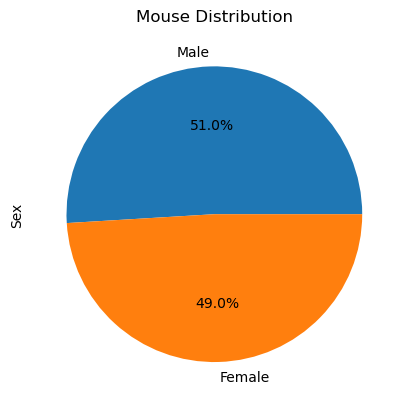

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_df, autopct='%1.1f%%', labels=['Male','Female'])
plt.title('Mouse Distribution')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
last_timepoint = last_timepoint.reset_index()
last_timepoint.head()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [21]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
treatments_df = pd.merge(last_timepoint, clean_df, on=['Mouse ID', 'Timepoint'], how='left')
treatments_df = treatments_df.loc[(treatments_df['Drug Regimen'] == 'Capomulin')|
                           (treatments_df['Drug Regimen'] == 'Ramicane') | 
                           (treatments_df['Drug Regimen'] == 'Infubinol') |
                           (treatments_df['Drug Regimen'] == 'Ceftamin')]
treatments_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,68.0,2,Infubinol,Female,20,23
1,a251,45,65.5,1,Infubinol,Female,21,25
3,a275,45,63.0,3,Ceftamin,Female,20,28
6,a411,45,38.4,1,Ramicane,Male,3,22
7,a444,45,43.0,0,Ramicane,Female,10,25


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_volume = treatments_df.loc[treatments_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(final_volume)

    #Calculate the IQR
    quartiles = final_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = final_volume.loc[(final_volume < lower_bound) | (final_volume > upper_bound)]
    
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.3
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


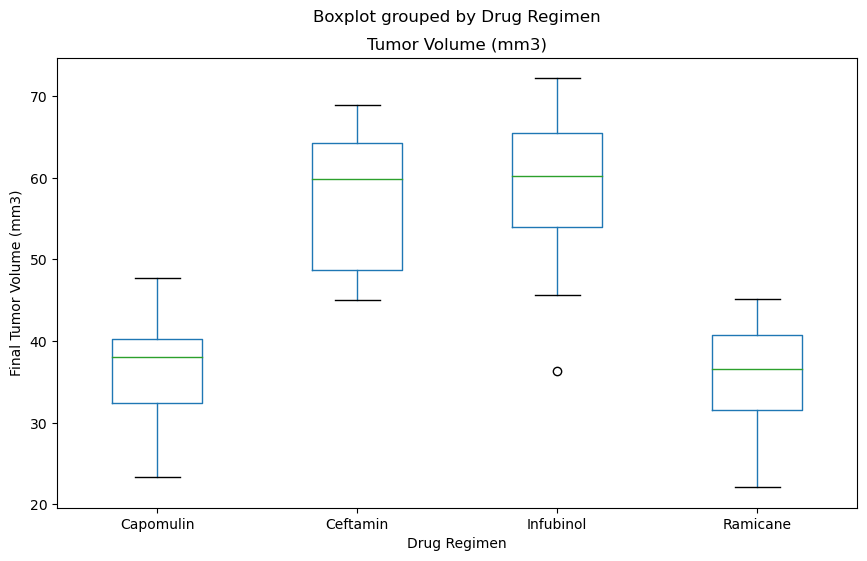

In [23]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatments_df.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', 
                      figsize=(10, 6), 
                      grid=False)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [26]:
# Filter out only the data on Capomulin
capo_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
capo_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


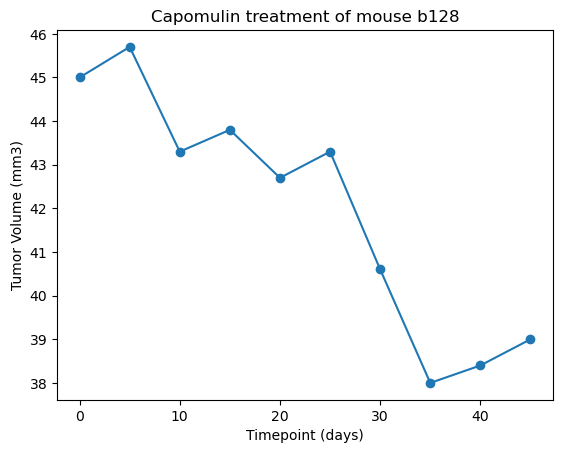

In [27]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capo_df_new = capo_df.loc[capo_df['Mouse ID'] == 'b128']

plt.plot(capo_df_new['Timepoint'], capo_df_new['Tumor Volume (mm3)'], 
         marker='o', label='Capomulin')
plt.title('Capomulin treatment of mouse b128')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [30]:
# Create a dataframe of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_tumor_volume = capo_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
merged_data = pd.merge(capo_df, average_tumor_volume, how='left', on='Mouse ID', 
                       suffixes=('_original', '_average'))
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3)_original,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3)_average
0,b128,0,45.0,0,Capomulin,Female,9,22,41.9800
1,j246,0,45.0,0,Capomulin,Female,21,21,43.2125
2,r554,0,45.0,0,Capomulin,Female,8,17,36.5200
3,s185,0,45.0,0,Capomulin,Female,3,17,34.5600
4,b742,0,45.0,0,Capomulin,Male,7,21,40.0800


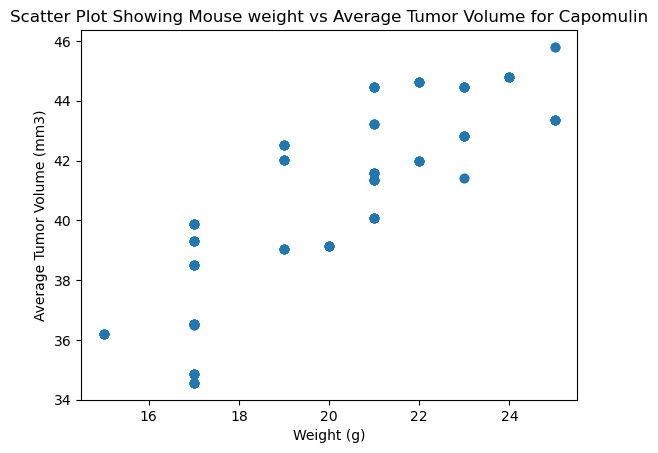

In [37]:
# Generate a scatter plot with the dataframe
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_average'], alpha=0.7)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Scatter Plot Showing Mouse weight vs Average Tumor Volume for Capomulin')
plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume (mm3) for Capomulin is 0.83


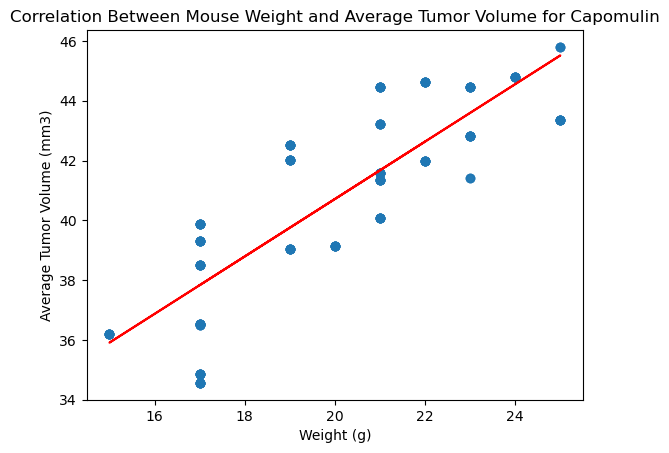

In [39]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Call back the Capomulin dataframe
average_tumor_volume = capo_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
merged_data = pd.merge(capo_df, average_tumor_volume, how='left', on='Mouse ID', suffixes=('_original', '_average'))

# Calculate correlation using Pearson
cor = round(st.pearsonr(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_average'])[0],2)
print(f'The correlation between weight and average tumor volume (mm3) for Capomulin is {cor}')

# Calculate linear regression using y = mx + b
model = st.linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_average'])
y_values = merged_data['Weight (g)'] * model[0] + model[1]

# Plot the graph with the line of best fit
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_average'], alpha=0.7)
plt.plot(merged_data['Weight (g)'], y_values, color='r')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Correlation Between Mouse Weight and Average Tumor Volume for Capomulin')
plt.show()